In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

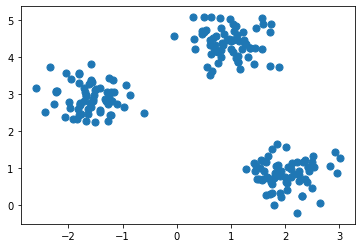

In [11]:
from sklearn.datasets import make_blobs
# make_blobs generates blobs of points with a gaussian distribution


# n_samples: total number of points to be evenly distributed among clusters
n_samples = 200

# centers: number of clusters
centers = 3

# cluster_std: standard deviations of the clusters
cluster_std = 0.4

# random_state: integer for reproducible output
random_state = 0

points, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
plt.scatter(points[:, 0], points[:, 1], s=50)

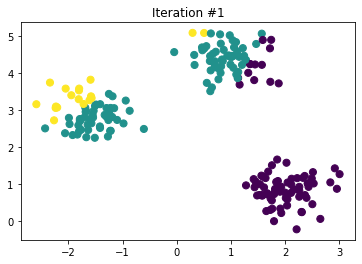

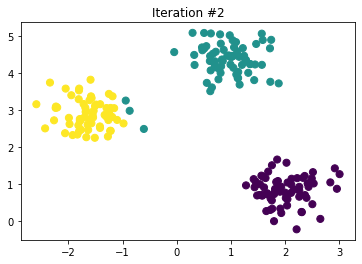

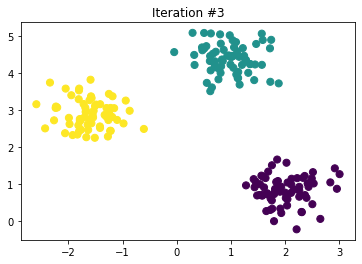

In [12]:
class KMeans:
    def __init__(self, points, centers, iterations):
        self.points = points
        self.centers = centers
        self.iterations = iterations
        
    def distance(self, p1, p2):
        return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

    def choose_cluster(self, point, centroids):
        closest = 0
        for c in range(len(centroids)):
            if self.distance(point, centroids[c]) < self.distance(point, centroids[closest]):
                closest = c
        return closest

    def find_center(self, points):
        if len(points) == 0:
            return [0, 0]
        x_coord, y_coord = 0, 0
        for p in points:
            x_coord += p[0]
            y_coord += p[1]
        n = len(points)
        return [x_coord/n, y_coord/n]

    def run(self):
        # generate random centroids
        random_indices = random.sample(range(len(self.points)), self.centers)
        centroids = self.points[random_indices]

        for i in range(self.iterations):
            # e-step
            # the cluster each point belongs to based on distance to centroids
            clusters = [self.choose_cluster(p, centroids) for p in self.points]

            # m-step
            # reassign centroids using previous clusters' means
            new_centroids = [self.find_center(self.points[np.where(np.array(clusters) == i)]) for i in range(self.centers)]

            # checks if old centroids and new centroids are equal
            if (np.all(centroids == new_centroids)):
                break

            # scatterplot of points and their assigned clusters
            plt.scatter(self.points[:, 0], self.points[:, 1], c=clusters, s=50, cmap='viridis')
            plt.title("Iteration #" + str(i+1))
            plt.show()

            # replaces old centroids with new centroids
            centroids = new_centroids
        
    
KMeans = KMeans(points, centers, 10) # 10 iterations unless centroids converge
KMeans.run()